# 452 - Machine Learning - Assignment 5 : Iris Dataset Classification

#### Overview :-
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. The task is to perform EDA on the properties and classify the species of a given flower based on its properties

The columns in this dataset are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [1]:
# Loading the required libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read the train and test datasets from Kaggle to create two DataFrames using Pandas
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.groupby('Species', as_index=False).agg({'Id':'count','SepalLengthCm':'mean','SepalWidthCm':'mean','PetalLengthCm':'mean',
                                                   'PetalWidthCm':'mean'})
#iris_df.groupby('Species', as_index=False).agg({'SepalLengthCm':'median','SepalWidthCm':'median','PetalLengthCm':'median',
 #                                                  'PetalWidthCm':'median'})

,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,50,5.006,3.418,1.464,0.244
1,Iris-versicolor,50,5.936,2.770,4.260,1.326
2,Iris-virginica,50,6.588,2.974,5.552,2.026


Based on averages, Iris setosa has the lowest sepal length, petal length and petal width, but highest sepal width. In contrast, Iris virginica has the highest sepal length, petal length and petal width. Mostly, Iris versicolor's dimensions lie in between the two.

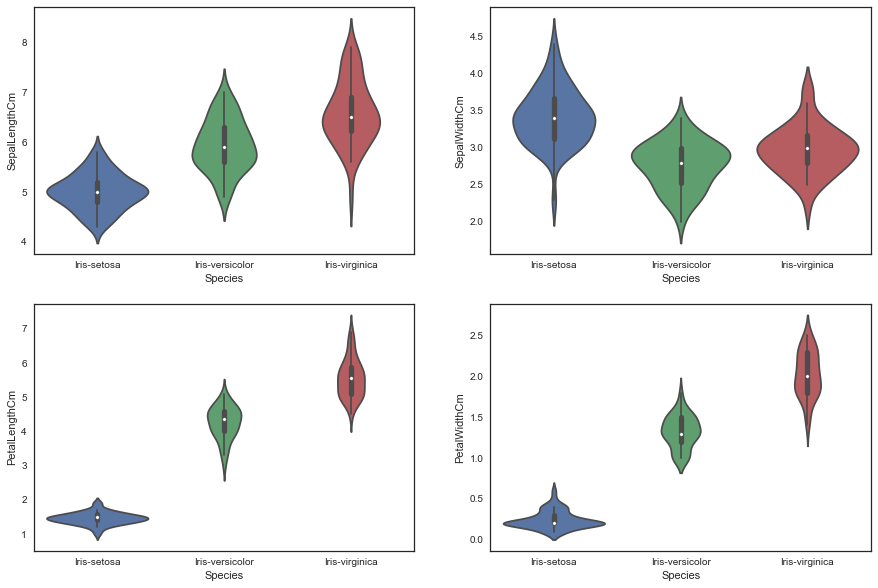

In [6]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris_df)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris_df)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris_df)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris_df)

The violin plot show that most of the Iris sentosa flowers have their petal length and width concentrated on the lower side. They are far below the other two species. Iris versicolor and virginica have mostly same density of flowers across the sepal dimensions and better differentiable based on petal dimensions.

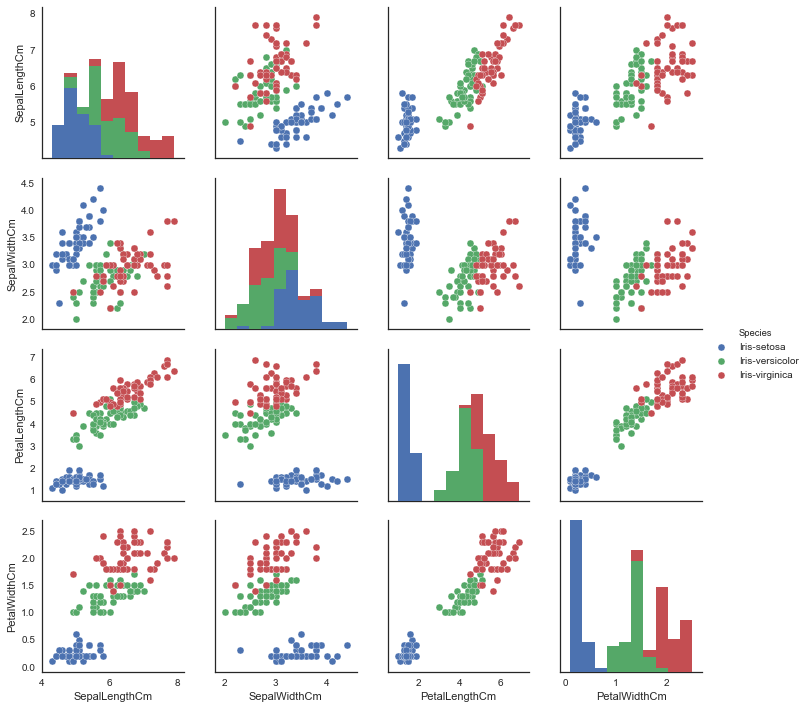

In [7]:
iris_df.drop('Id', axis = 1, inplace =  True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.pairplot(iris_df, hue="Species")

On any two dimensions, Iris Setosa is pretty distinct from the other two species. Iris versicolor and virginica are overlapping in sepal dimensions. Petal dimensions seem to be the better in segregating the three species. This essentially confirms the same obesrvations as from the violin plots.

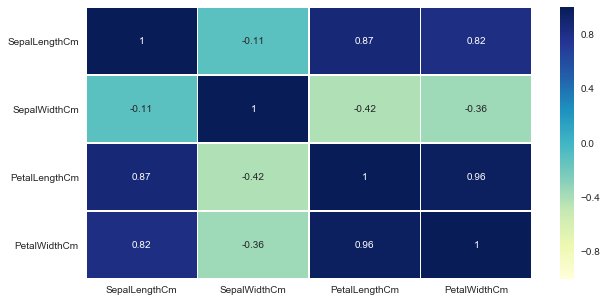

In [8]:
plt.subplots(figsize=(10,5))
sns.heatmap(iris_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

Petal Length and width have very high correlation with each other and also with Sepal length. Let's keep all the variables in the dataset as of now and we can remove one of them later to improve the accuracy of the model, if required.

Now let's get into the model development. We will try various ML classification techniques and retain the one with the highest accuracy.

In [9]:
# Separating the response (y) and explanatory (x) variables
X = iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y = iris_df["Species"].values

In [10]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [11]:
# Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
print("The accuracy of the Logistic Regression is", metrics.accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression is 0.933333333333


In [12]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
print("The accuracy of the SVM is", metrics.accuracy_score(y_pred,y_test))

The accuracy of the SVM is 1.0


In [13]:
# Naive Bayes Classification
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred = GNB.predict(X_test)
print("The accuracy of the Naive Bayes is", metrics.accuracy_score(y_pred,y_test))

The accuracy of the Naive Bayes is 0.933333333333


In [14]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
print("The accuracy of the Decision Tree is", metrics.accuracy_score(y_pred, y_test))

The accuracy of the Decision Tree is 0.955555555556


In [15]:
RandFor = RandomForestClassifier(max_depth = 6, min_samples_split=2, n_estimators = 100, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
print("The accuracy of the Random Forest is", metrics.accuracy_score(y_pred, y_test))

The accuracy of the Random Forest is 0.955555555556


In [16]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)

[ 0.01197426  0.01908397  0.07139256  0.89754922]
[ 0.11240192  0.03747068  0.44495169  0.40517572]


Decision Trees and Random Forest give the highest accuracy and also, we can see that feature importance is highest for the petal dimensions. We can check if removing the sepal dimensions also give accuracy score good enough. This will reduce the cost of collecting information and also the model complexity (although there are just four features, still it could be more straightforward).

Let's run the Random forest again with just petal dimensions. ( We also get the category codes in numeric form so as to plot the decision boundaries later and conform with ML norms)

In [17]:
iris_df['Species_cat'] = pd.Categorical(iris_df['Species'])
y = iris_df['Species_cat'].cat.codes
X = iris_df[["PetalLengthCm","PetalWidthCm"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
RandFor = RandomForestClassifier(max_depth = 6, min_samples_split=2, n_estimators = 20, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
print("The accuracy of the Random Forest is", metrics.accuracy_score(y_pred, y_test))

The accuracy of the Random Forest is 0.955555555556


Let's plot the decision boundaries now.

In [18]:
# Define the plot decision region function (from Python Machine Learning by Sebastian Raschka)
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
       # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
       # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=cmap(idx),
                       marker=markers[idx], label=cl)
       # highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], color='black',
                   alpha=1.0, linewidth=1, marker='o',facecolors='None',
                   s=60, label='test set')

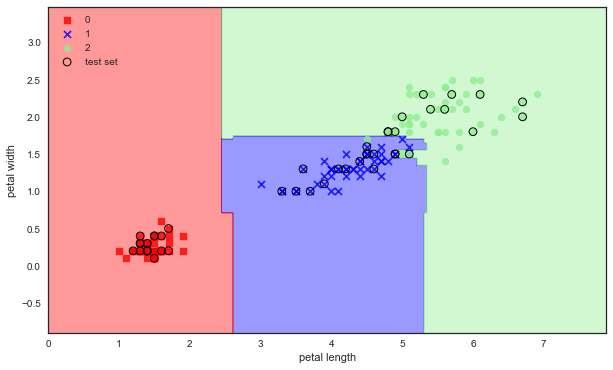

In [26]:
# Combine the train and test data in sequence and call the plot decision region function
X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))
plt.subplots(figsize=(10,6))
plot_decision_regions(X_all, y_all, classifier=RandFor, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

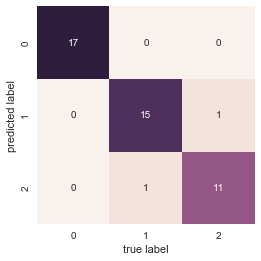

In [20]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.94      0.94      0.94        16
          2       0.92      0.92      0.92        12

avg / total       0.96      0.96      0.96        45



We see that Random Forest does a very good job of classifying the flowers in their own species. The Iris Setosa seems to have been classified correctly at all times. There was some confusion between the other two and hence one versicolor was classified as virginica and vice-versa. This can be attributed to the petal dimensions being slightly close for these two than the setosa species.